In [30]:
#Paso 4

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')

In [32]:
#Primeras filas para revision
print("Empresas de taxis:")
print(df_companies.head())

print("\nBarrios de Chicago:")
print(df_neighborhoods.head())


Empresas de taxis:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Barrios de Chicago:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [33]:
# Verificar tipos de datos
print("\nTipos de datos df_companies:")
print(df_companies.dtypes)

print("\nTipos de datos df_neighborhoods:")
print(df_neighborhoods.dtypes)


Tipos de datos df_companies:
company_name    object
trips_amount     int64
dtype: object

Tipos de datos df_neighborhoods:
dropoff_location_name     object
average_trips            float64
dtype: object


In [34]:
#Convertir trips_amount y average_trips en numeric para un mejor analisis
df_companies['trips_amount'] = pd.to_numeric(df_companies['trips_amount'], errors='coerce')
df_neighborhoods['average_trips'] = pd.to_numeric(df_neighborhoods['average_trips'], errors='coerce')

#Top 10 barrios que finalizaron el recorrido (En promedio)
top_10_neighborhoods = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)
print("\nTop 10 barrios en finalizaciones por promedio:")
print(top_10_neighborhoods)



Top 10 barrios en finalizaciones por promedio:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


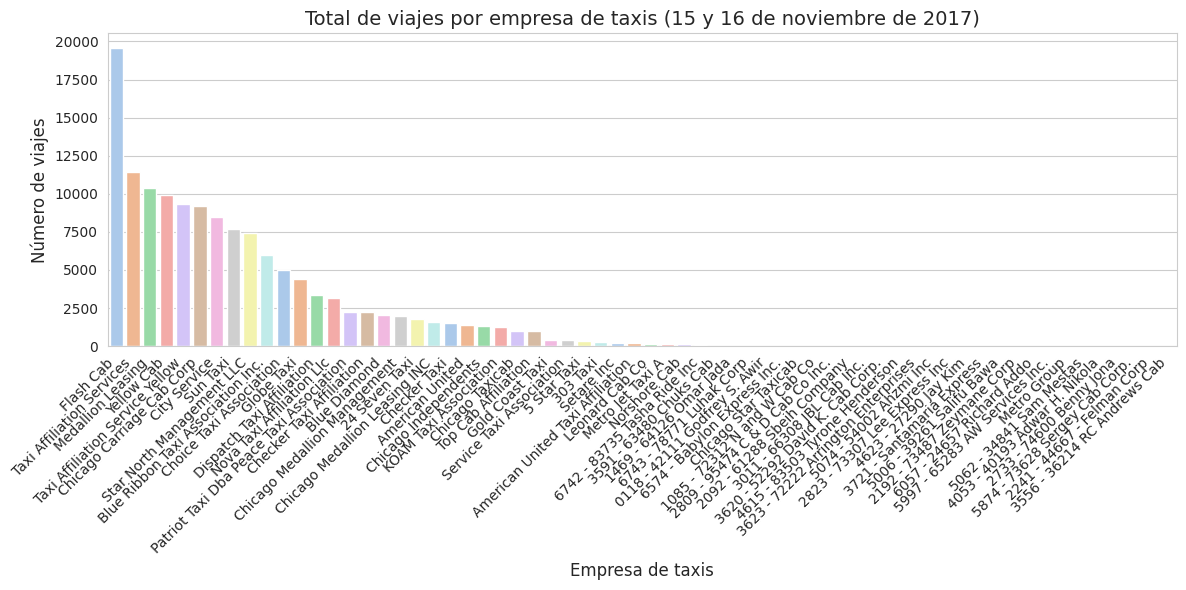

In [35]:
# Gráfico 1: Total de viajes por empresas de taxis.
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

# Ordenar los datos
sorted_df = df_companies.sort_values('trips_amount', ascending=False)

sns.barplot(
    data=sorted_df, 
    x='company_name', 
    y='trips_amount', 
    palette='pastel'
)

plt.xticks(rotation=45, ha='right')
plt.title('Total de viajes por empresa de taxis (15 y 16 de noviembre de 2017)', fontsize=14)
plt.xlabel('Empresa de taxis', fontsize=12)
plt.ylabel('Número de viajes', fontsize=12)
plt.tight_layout()
plt.show()


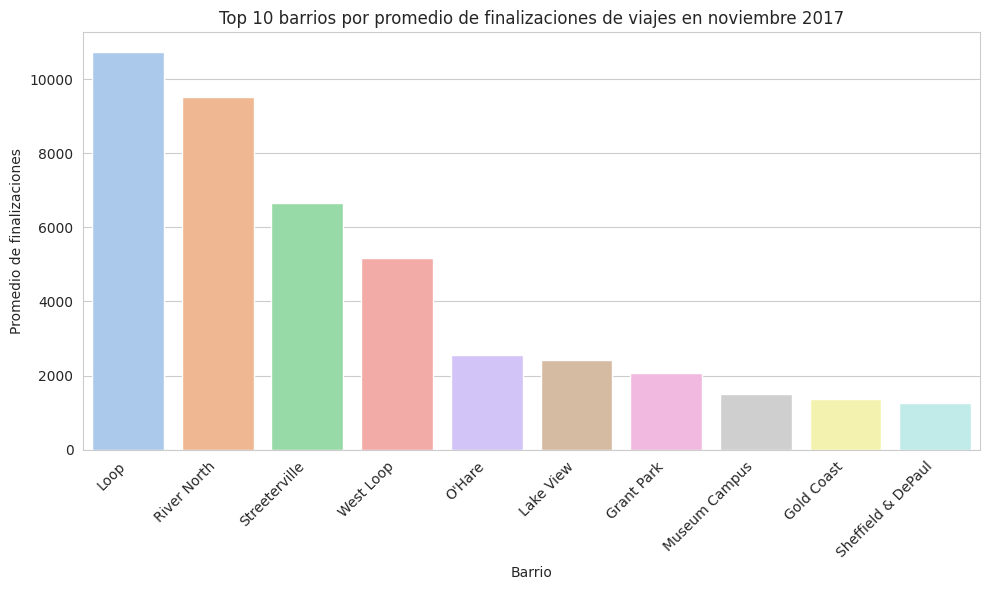

In [36]:

# Gráfico 2: Top 10 barrios por promedio de finalizaciones
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_neighborhoods, x='dropoff_location_name', y='average_trips', palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 barrios por promedio de finalizaciones de viajes en noviembre 2017')
plt.xlabel('Barrio')
plt.ylabel('Promedio de finalizaciones')
plt.tight_layout()
plt.show()



In [37]:
print("\nConclusiones:")
print("- En el primer grafico 'Total de viajes por empresa de taxis (15 y 16 de noviembre de 2017)' podemos observar como domina por diferencia la empresa 'Flash Cab'")
print("- El segundo gráfico muestra que algunos barrios concentran la mayoría de las finalizaciones, lo cual puede indicar zonas de alta demanda o puntos estratégicos.")
print("- Esto nos sirve para dar inicio a un analisis mas profundo para averiguar la razon de este comportamiento en los datos y poder usar dicha informacion para comprobar la hipótesis planteada")


Conclusiones:
- En el primer grafico 'Total de viajes por empresa de taxis (15 y 16 de noviembre de 2017)' podemos observar como domina por diferencia la empresa 'Flash Cab'
- El segundo gráfico muestra que algunos barrios concentran la mayoría de las finalizaciones, lo cual puede indicar zonas de alta demanda o puntos estratégicos.
- Esto nos sirve para dar inicio a un analisis mas profundo para averiguar la razon de este comportamiento en los datos y poder usar dicha informacion para comprobar la hipótesis planteada


In [38]:
#Paso 5

In [39]:
#Planteamiento de la hipotesis 
print("Planteamiento de la hipotesis")
print("\nHipótesis nula (H0):")
print("La duración promedio de los viajes desde Loop a O'Hare no cambia en los sábados lluviosos a comparación con los sábados con buen clima.")

print("\nHipótesis alternativa (H1):")
print("La duración promedio sí cambia en sábados lluviosos.")


Planteamiento de la hipotesis

Hipótesis nula (H0):
La duración promedio de los viajes desde Loop a O'Hare no cambia en los sábados lluviosos a comparación con los sábados con buen clima.

Hipótesis alternativa (H1):
La duración promedio sí cambia en sábados lluviosos.


In [40]:
#Planteamiento de la hipotesis 
print("Planteamiento de la hipotesis")
print("\nHipótesis nula (H0):")
print("La duración promedio de los viajes desde Loop a O'Hare no cambia en los sábados lluviosos a comparación con los sábados con buen clima.")

print("\nHipótesis alternativa (H1):")
print("La duración promedio sí cambia en sábados lluviosos.")


Planteamiento de la hipotesis

Hipótesis nula (H0):
La duración promedio de los viajes desde Loop a O'Hare no cambia en los sábados lluviosos a comparación con los sábados con buen clima.

Hipótesis alternativa (H1):
La duración promedio sí cambia en sábados lluviosos.


In [41]:
import pandas as pd
from scipy.stats import ttest_ind

# Cargar datos
df = pd.read_csv('/datasets/project_sql_result_07.csv')

In [42]:
# Convertir start_ts a datetime
df['start_ts'] = pd.to_datetime(df['start_ts'])

In [43]:
# Filtrar solo los sábados
df['day_of_week'] = df['start_ts'].dt.dayofweek  # lunes=0 ... domingo=6
saturdays = df[df['day_of_week'] == 5]

In [44]:
# Separar weather_conditions en buen clima y mal clima
bad_weather = saturdays[saturdays['weather_conditions'] == 'Bad']['duration_seconds']
good_weather = saturdays[saturdays['weather_conditions'] == 'Good']['duration_seconds']


In [45]:
# Estadísticas
print("Media duración en clima malo (Bad):", bad_weather.mean())
print("Media duración en clima bueno (Good):", good_weather.mean())


Media duración en clima malo (Bad): 2427.2055555555557
Media duración en clima bueno (Good): 1999.6756756756756


In [46]:
# Prueba t de muestras independientes (asumiendo varianzas iguales o desiguales)
stat, p_value = ttest_ind(bad_weather, good_weather, equal_var=False) 

print(f"\nEstadístico t: {stat:.4f}")
print(f"p-valor: {p_value:.4f}")



Estadístico t: 7.1860
p-valor: 0.0000


In [47]:
# Nivel de significación
alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula: La duración promedio cambia en sábados lluviosos.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para decir que la duración promedio cambia.")

Rechazamos la hipótesis nula: La duración promedio cambia en sábados lluviosos.
